In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("/content/heart.data.csv")

In [21]:
df.head()

,biking,smoking,heart.disease
0,30.801246,10.896608,11.769423
1,65.129215,2.219563,2.854081
2,1.959665,17.588331,17.177803
3,44.800196,2.802559,6.816647
4,69.428454,15.974505,4.062224


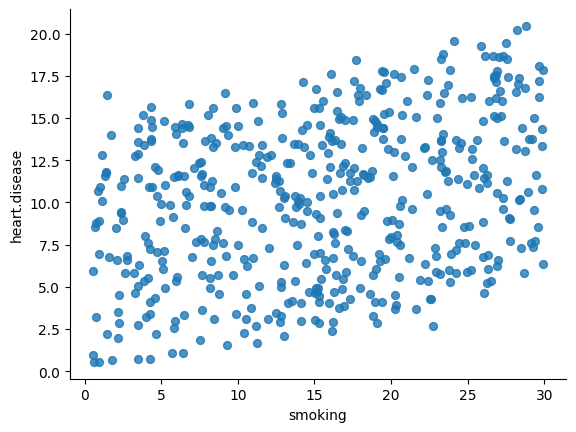

In [23]:
df.plot(kind='scatter', x='smoking', y='heart.disease', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

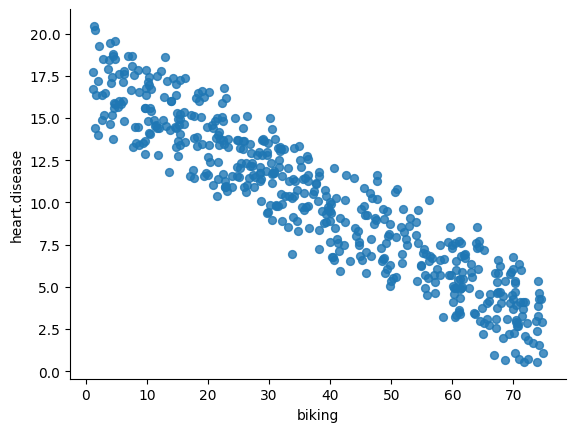

In [24]:
df.plot(kind='scatter', x='biking', y='heart.disease', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     498 non-null    int64  
 1   biking         498 non-null    float64
 2   smoking        498 non-null    float64
 3   heart.disease  498 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 15.7 KB


In [4]:
df.isnull().sum()

Unnamed: 0       0
biking           0
smoking          0
heart.disease    0
dtype: int64

In [15]:
df = df.drop(['Unnamed: 0'],axis = 1)

In [16]:
X = df.drop(['heart.disease'], axis=1)
y = df['heart.disease']

In [17]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y.values.reshape(-1, 1))

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
lg = LinearRegression()
lg.fit(x_train, y_train)

LinearRegression()

In [26]:
lg.score(x_test,y_test)

0.9751106638392245

In [27]:
print("Intercept:", lg.intercept_)
print("Coefficients:", lg.coef_)

Intercept: [0.00168376]
Coefficients: [[-0.94331683  0.32324998]]


In [30]:
y_pred = lg.predict(x_test)

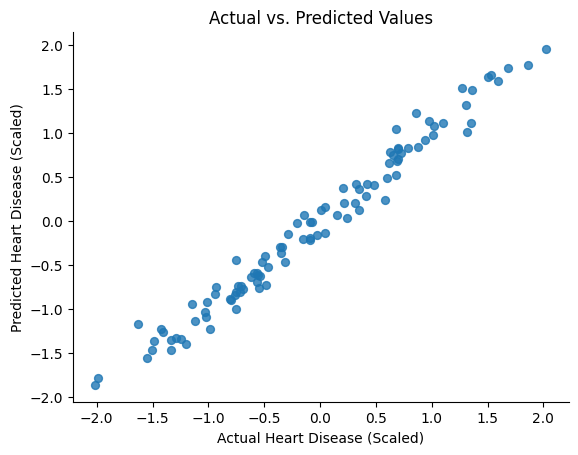

In [31]:
plt.scatter(y_test, y_pred, s=32, alpha=0.8)
plt.xlabel('Actual Heart Disease (Scaled)')
plt.ylabel('Predicted Heart Disease (Scaled)')
plt.title('Actual vs. Predicted Values')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

In [32]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.02168008712354459
R-squared: 0.9751106638392245
